<a href="https://colab.research.google.com/github/vincnardelli/covstat/blob/master/CovidPy_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#cd gdrive/My Drive/Colab Notebooks/results

# Situazione italiana

### Importa i dati

In [ ]:
# dati cumulativi
 
data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']
ydata_tamponi=data['tamponi']
ydata_ospedale=np.array(data['totale_ospedalizzati'])
ydata_ricoverati=np.array(data['ricoverati_con_sintomi'])
 
ydata_death=np.array(ydata_death)
ydata_rec=np.array(ydata_rec)
ydata=np.array(ydata)
 
ydata_inf=np.array(ydata-ydata_rec-ydata_death)
 
ydata_terint=np.array(data['terapia_intensiva'])
 
print(data.iloc[-1,:])
 
data.head()

data                            2020-10-15T17:00:00
stato                                           ITA
ricoverati_con_sintomi                         5796
terapia_intensiva                               586
totale_ospedalizzati                           6382
isolamento_domiciliare                        92884
totale_positivi                               99266
variazione_totale_positivi                     6821
nuovi_positivi                                 8804
dimessi_guariti                              245964
deceduti                                      36372
casi_da_sospetto_diagnostico                 285569
casi_da_screening                             96033
totale_casi                                  381602
tamponi                                    13077827
casi_testati                            7.90846e+06
note                                            NaN
Name: 234, dtype: object


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


In [ ]:
def moving_avg(array,window=7):
    '''This function computes the moving average, given a time window'''
    array_mobile = []
    for i in range(len(array)-window+1):
        mean_parz = np.mean(array[i:i+window])
        array_mobile.append(mean_parz)
        
    return np.array(array_mobile)


def lin_func(t,coeff):
  '''This function takes the coefficient from polyfit'''
  return coeff[1]+t*coeff[0]

In [ ]:
ymorti=np.diff(ydata_death)
#ymorti[172]=ymorti[172]-154   # ricalcolo morti Emilia-Romagna
ymorti=np.append([0,0,0,0,0,0,0],ymorti)
 
ydata_morti = moving_avg(ymorti)

### Confronto con la prima ondata

ospedalizzati attuali 6382 ospedalizzati massimo 33004
terapia intensiva attuali 586 terapia intensiva massimo 4068
decessi giornalieri attuali 41.0 decessi giornalieri massimo 821.0
0.193 0.144 0.05


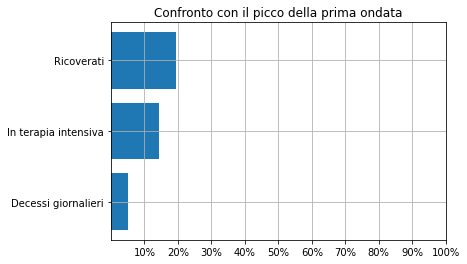

In [ ]:
kk1=round(ydata_ospedale[-1]/np.max(ydata_ospedale),3)
kk2=round(ydata_terint[-1]/np.max(ydata_terint),3)
kk3=round(ydata_morti[-1]/np.max(ydata_morti),3)

print('ospedalizzati attuali',ydata_ospedale[-1],'ospedalizzati massimo',np.max(ydata_ospedale))
print('terapia intensiva attuali',ydata_terint[-1],'terapia intensiva massimo',np.max(ydata_terint))
print('decessi giornalieri attuali',round(ydata_morti[-1]),'decessi giornalieri massimo',round(np.max(ydata_morti)))

print(kk1,kk2,kk3)
 
plt.barh([0,1,2],[kk3,kk2,kk1])
plt.xlim(0,1)
plt.yticks([2,1,0],['Ricoverati','In terapia intensiva','Decessi giornalieri'],rotation=0)
plt.xticks(np.arange(0.1,1.1,0.1),['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Confronto con il picco della prima ondata')
plt.grid()
plt.show()

### Confronto ospedalizzati, ricoverati in terapia intensiva e deceduti

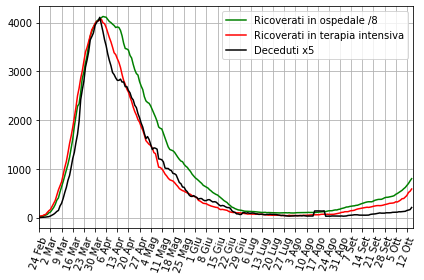

In [ ]:
# confronto curve ricoverati, terapia intensiva e deceduti
 
plt.plot(ydata_ospedale/8,color='green',label='Ricoverati in ospedale /8')
plt.plot(ydata_terint,color='red',label='Ricoverati in terapia intensiva')
plt.plot(ydata_morti*5,color='black',label='Deceduti x5')
plt.xticks(np.arange(0,250,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu','8 Giu','15 Giu','22 Giu','29 Giu','6 Lug','13 Lug','20 Lug','27 Lug','3 Ago','10 Ago','17 Ago','24 Ago','31 Ago','7 Set','14 Set','21 Set','28 Set','5 Ott','12 Ott','19 Ott','26 Ott'],rotation=70)
#plt.ylim(0,200)
plt.xlim(0,len(ydata_terint))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('terint_plot.png',dpi=300)
plt.show()

In [ ]:
# last period analysis

y1 = ydata_ospedale[-30:]/8
y2 = ydata_terint[-30:]
y3 = ydata_morti[-30:]*5

c1 = np.polyfit(np.arange(0,30),y1,1)
c2 = np.polyfit(np.arange(0,30),y2,1)
c3 = np.polyfit(np.arange(0,30),y3,1)

tgrid = np.arange(0,30)
y1fit=lin_func(tgrid,c1)
y2fit=lin_func(tgrid,c2)
y3fit=lin_func(tgrid,c3)

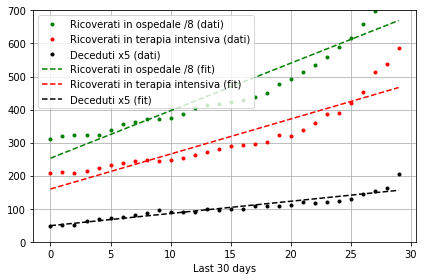

In [ ]:
plt.plot(y1,'.g',label='Ricoverati in ospedale /8 (dati)')
plt.plot(y2,'.r',label='Ricoverati in terapia intensiva (dati)')
plt.plot(y3,'.k',label='Deceduti x5 (dati)')
plt.plot(y1fit,color='green',label='Ricoverati in ospedale /8 (fit)',linestyle='--')
plt.plot(y2fit,color='red',label='Ricoverati in terapia intensiva (fit)',linestyle='--')
plt.plot(y3fit,color='black',label='Deceduti x5 (fit)',linestyle='--')
#plt.plot(ydata_morti*5,color='black',label='Deceduti x5')
#plt.xticks(np.arange(0,250,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu','8 Giu','15 Giu','22 Giu','29 Giu','6 Lug','13 Lug','20 Lug','27 Lug','3 Ago','10 Ago','17 Ago','24 Ago','31 Ago','7 Set','14 Set','21 Set','28 Set','5 Ott'],rotation=70)
plt.ylim(0,700)
plt.xlabel('Last 30 days')
#plt.xlim(len(ydata_terint)-30,len(ydata_terint))
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('output3/terint_plot.png',dpi=300)
plt.show()

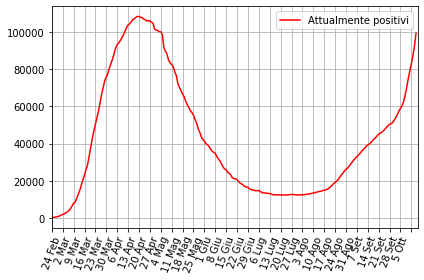

In [ ]:
# attualmente positivi

plt.plot(ydata_inf,color='red',label='Attualmente positivi')
plt.xticks(np.arange(0,250,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu','8 Giu','15 Giu','22 Giu','29 Giu','6 Lug','13 Lug','20 Lug','27 Lug','3 Ago','10 Ago','17 Ago','24 Ago','31 Ago','7 Set','14 Set','21 Set','28 Set','5 Ott'],rotation=70)
#plt.ylim(0,200)
plt.xlim(0,len(ydata_inf))
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('output3/terint_plot.png',dpi=300)
plt.show()

### Correlazione tamponi - infetti

Coefficiente di correlazione  0.8759488384700572


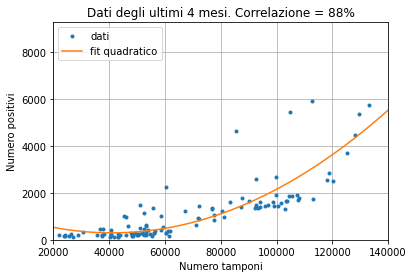

In [ ]:
yt=np.diff(ydata_tamponi[-120:])
yp=np.diff(ydata[-120:])
 
print('Coefficiente di correlazione ',np.corrcoef(yt**2,yp)[0,1])
 
# fit quadratico
coef = np.polyfit(yt,yp,2)
x=1000*np.arange(0,150,1)
yfit= coef[2]+coef[1]*x+coef[0]*x**2
 
plt.plot(yt,yp,'.',label='dati')
plt.plot(x,yfit,label='fit quadratico')
plt.xlabel('Numero tamponi')
plt.ylabel('Numero positivi')
plt.grid()
plt.ylim(0,)
plt.xlim(20000,140000)
plt.title('Dati degli ultimi 4 mesi. Correlazione = 88%')
plt.legend(loc=2)
plt.savefig('corr_tamponi_infetti.png',dpi=300)
plt.show()

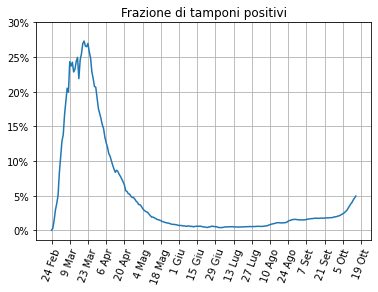

In [ ]:
frac_tamponi_positivi = np.append([0,0,0,0,0,0,0],np.diff(ydata)/np.diff(ydata_tamponi))
frac_tamponi_positivi_avg = moving_avg(frac_tamponi_positivi)*100

plt.plot(frac_tamponi_positivi_avg)
plt.grid()
plt.yticks(np.arange(0,31,5),['0%','5%','10%','15%','20%','25%','30%'])
plt.xticks(np.arange(0,250,14),['24 Feb','9 Mar','23 Mar','6 Apr','20 Apr','4 Mag','18 Mag','1 Giu','15 Giu','29 Giu','13 Lug','27 Lug','10 Ago','24 Ago','7 Set','21 Set','5 Ott','19 Ott'],rotation=70)
plt.title('Frazione di tamponi positivi')
plt.show()

### Sommario

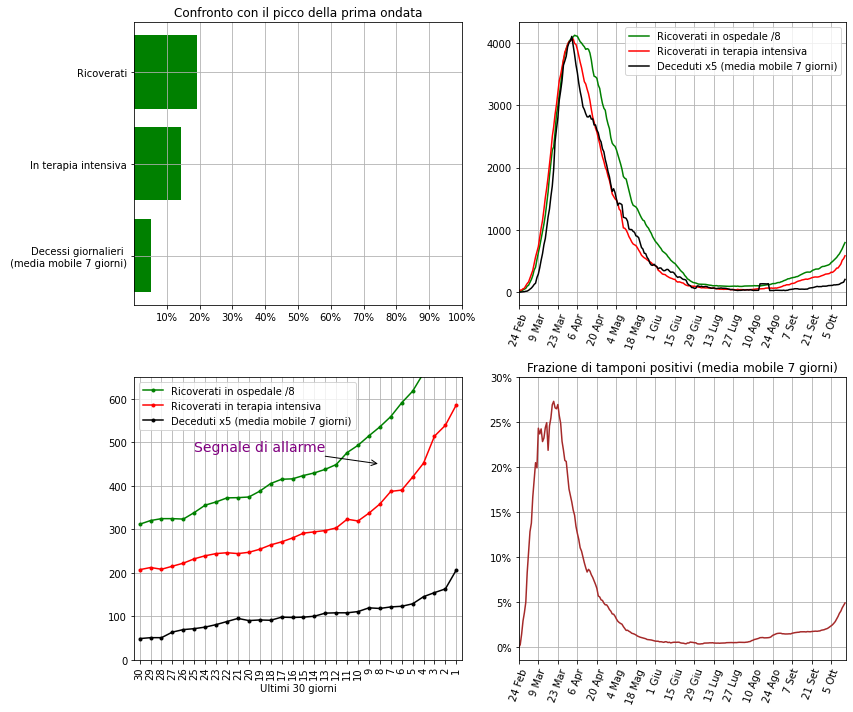

In [ ]:
# sommario

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.barh([0,1,2],[kk3,kk2,kk1],color='green')
plt.xlim(0,1)
plt.yticks([2,1,0],['Ricoverati','In terapia intensiva','Decessi giornalieri \n (media mobile 7 giorni)'],rotation=0)
plt.xticks(np.arange(0.1,1.1,0.1),['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Confronto con il picco della prima ondata')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ydata_ospedale/8,color='green',label='Ricoverati in ospedale /8')
plt.plot(ydata_terint,color='red',label='Ricoverati in terapia intensiva')
plt.plot(ydata_morti*5,color='black',label='Deceduti x5 (media mobile 7 giorni)')
plt.xticks(np.arange(0,250,14),['24 Feb','9 Mar','23 Mar','6 Apr','20 Apr','4 Mag','18 Mag','1 Giu','15 Giu','29 Giu','13 Lug','27 Lug','10 Ago','24 Ago','7 Set','21 Set','5 Ott','19 Ott'],rotation=70)
plt.xlim(0,len(ydata_terint))
plt.grid()
plt.legend()
plt.subplot(2,2,3)
plt.plot(y1,'g',marker='.',label='Ricoverati in ospedale /8')
plt.plot(y2,'r',marker='.',label='Ricoverati in terapia intensiva')
plt.plot(y3,'k',marker='.',label='Deceduti x5 (media mobile 7 giorni)')
#plt.plot(y1fit,color='green',label='Ricoverati in ospedale /10 (fit)',linestyle='--')
#plt.plot(y2fit,color='red',label='Ricoverati in terapia intensiva (fit)',linestyle='--')
#plt.plot(y3fit,color='black',label='Deceduti x5 (fit)',linestyle='--')
plt.annotate('Segnale di allarme',xy=(22,450),xytext=(5,480),arrowprops={'arrowstyle':'->'},fontsize=14,color='purple')
plt.xticks(np.arange(0,30),np.arange(30,0,-1),rotation=90)
plt.xlim(-0.5,29.5)
plt.ylim(0,650)
plt.xlabel('Ultimi 30 giorni')
plt.grid()
plt.legend()
plt.subplot(2,2,4)
plt.plot(frac_tamponi_positivi_avg,color='brown')
plt.grid()
plt.yticks(np.arange(0,31,5),['0%','5%','10%','15%','20%','25%','30%'])
plt.xticks(np.arange(0,250,14),['24 Feb','9 Mar','23 Mar','6 Apr','20 Apr','4 Mag','18 Mag','1 Giu','15 Giu','29 Giu','13 Lug','27 Lug','10 Ago','24 Ago','7 Set','21 Set','5 Ott','19 Ott'],rotation=70)
plt.title('Frazione di tamponi positivi (media mobile 7 giorni)')
plt.xlim(0,len(frac_tamponi_positivi_avg))
plt.tight_layout()
plt.savefig('multi_comparison.png',dpi=300)
plt.show()

# Dati regionali

### Importa i dati

In [ ]:
nomiregioni       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna',
                              'Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte',
                              'Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])



pop_regioni   =  np.array([1304970, 559084,533050, 1947131, 5801692, 4459477, 1215220, 5879082, 1550640, 10060574, 1525271, 305617, 4356406, 4029053, 1639591, 4999891, 3729641,541380, 882015, 125666, 4905854])


df_popregioni=pd.DataFrame(pop_regioni)
df_popregioni.index=nomiregioni
df_popregioni.columns=['Popolazione']

df_popregioni

,Popolazione
Abruzzo,1304970
Basilicata,559084
P.A. Bolzano,533050
Calabria,1947131
Campania,5801692
Emilia-Romagna,4459477
Friuli Venezia Giulia,1215220
Lazio,5879082
Liguria,1550640
Lombardia,10060574


In [ ]:
#nome_regione=input('Scegli la regione: ')
nome_regione='Abruzzo'

popolazione_regione=df_popregioni.loc[str(nome_regione),'Popolazione']

print(popolazione_regione)

1304970


In [ ]:
# dati cumulativi

data_reg = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
mask = data_reg['denominazione_regione']==nome_regione
data_reg =data_reg.loc[mask,:]

xdata_reg=pd.to_numeric(range(data_reg.shape[0]))
ydata_reg=np.array(data_reg['totale_casi'])
ydata_death_reg=np.array(data_reg['deceduti'])
ydata_rec_reg=np.array(data_reg['dimessi_guariti'])

ydata_inf_reg=np.array(ydata_reg-ydata_rec_reg-ydata_death_reg)

# i dati iniziano all'ottavo giorno. Prima non ci sono contagi
delay=0
ydata_reg=ydata_reg[delay:]
ydata_death_reg=ydata_death_reg[delay:]
ydata_rec_reg=ydata_rec_reg[delay:]
ydata_inf_reg=ydata_inf_reg[delay:]

print(data_reg.iloc[-1,:])

data_reg.head()

data                                                          2020-10-15T17:00:00
stato                                                                         ITA
codice_regione                                                                 13
denominazione_regione                                                     Abruzzo
lat                                                                       42.3512
long                                                                      13.3984
ricoverati_con_sintomi                                                        159
terapia_intensiva                                                              10
totale_ospedalizzati                                                          169
isolamento_domiciliare                                                       1824
totale_positivi                                                              1993
variazione_totale_positivi                                                    192
nuovi_positivi  

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN
21,2020-02-25T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN
42,2020-02-26T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,13,NaN,NaN
63,2020-02-27T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,1,1,0,0,NaN,NaN,1,33,NaN,NaN
84,2020-02-28T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,0,0,0,0,NaN,NaN,1,33,NaN,NaN


### Confronto regionale (ricoverati, in terapia intensiva e decessi)

In [ ]:
ydata_terint_reg=np.array(data_reg['terapia_intensiva'])
ydata_ospedale_reg=np.array(data_reg['totale_ospedalizzati'])
ydata_tamponi_reg=np.array(data_reg['tamponi'])

positivi_giorn_reg=np.diff(ydata_reg)
tamponi_giorn_reg=np.diff(ydata_tamponi_reg)

ymorti_reg_avg = moving_avg(np.append([0,0,0,0,0,0,0],np.diff(ydata_death_reg)))

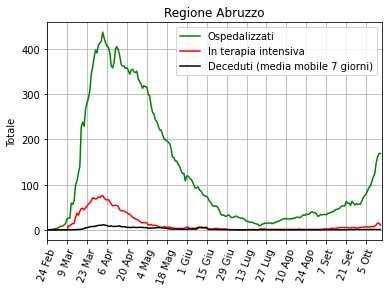

In [ ]:
plt.plot(np.arange(len(ydata_reg)),ydata_ospedale_reg,label='Ospedalizzati',color='green')
plt.plot(np.arange(len(ydata_reg)),ydata_terint_reg,label='In terapia intensiva',color='red')
plt.plot(np.arange(len(ydata_reg)),ymorti_reg_avg,label='Deceduti (media mobile 7 giorni)',color='black')
plt.xticks(np.arange(0,250,14),['24 Feb','9 Mar','23 Mar','6 Apr','20 Apr','4 Mag','18 Mag','1 Giu','15 Giu','29 Giu','13 Lug','27 Lug','10 Ago','24 Ago','7 Set','21 Set','5 Ott','19 Ott'],rotation=70)
plt.xlim(0,len(ydata_reg))
plt.ylabel('Totale')
plt.title('Regione '+str(nome_regione))
plt.legend()
plt.grid()
#plt.savefig('output3_regioni/dataonly.png')
plt.show()

# Situazione nel mondo

### Importa i dati

In [ ]:
file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [ ]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228


In [ ]:
def daily_infected(country):
    df_confirmed_country = df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:]
    ydata_inf =  np.sum(np.diff(np.array(df_confirmed_country)),axis=0)
    xdata_inf =  pd.to_datetime(df_confirmed_country.columns[1:],infer_datetime_format=True)
    return xdata_inf,ydata_inf

def daily_deaths(country):
    df_deaths_country = df_deaths[df_deaths['Country/Region']==country].iloc[:,4:]
    ydata_inf =  np.sum(np.diff(np.array(df_deaths_country)),axis=0)
    xdata_inf =  pd.to_datetime(df_deaths_country.columns[1:],infer_datetime_format=True)
    return xdata_inf,ydata_inf

def daily_recovered(country):
    df_recovered_country = df_recovered[df_recovered['Country/Region']==country].iloc[:,4:]
    ydata_inf =  np.sum(np.diff(np.array(df_recovered_country)),axis=0)
    xdata_inf =  pd.to_datetime(df_recovered_country.columns[1:],infer_datetime_format=True)
    return xdata_inf,ydata_inf

def daily_deaths_avg(country,window_mean=7):
    df_deaths_country = df_deaths[df_deaths['Country/Region']==country].iloc[:,4:]
    ydata_deaths = np.sum(np.diff(np.array(df_deaths_country)),axis=0)
    xdata_deaths = pd.to_datetime(df_deaths_country.columns[1:],infer_datetime_format=True)
    ydata_deaths_mean = moving_avg(ydata_deaths,window=window_mean)
    return xdata_deaths[window_mean-1:],ydata_deaths_mean,xdata_deaths,ydata_deaths

### Confronto decessi fra nazioni

In [ ]:
#  single country
select_country = 'Italy'    # you can choose the country here

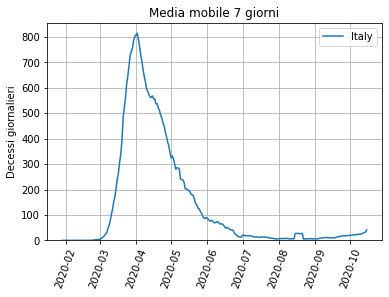

In [ ]:
plt.plot(daily_deaths_avg(select_country)[0],daily_deaths_avg(select_country)[1],label=select_country)
plt.xticks(rotation=70)
plt.ylim(0,)
plt.grid()
plt.ylabel('Decessi giornalieri')
plt.title('Media mobile 7 giorni')
plt.legend()
plt.show()

In [ ]:
# list of countries
list_of_countries = ['Italy','Germany','Spain','France','US','United Kingdom']

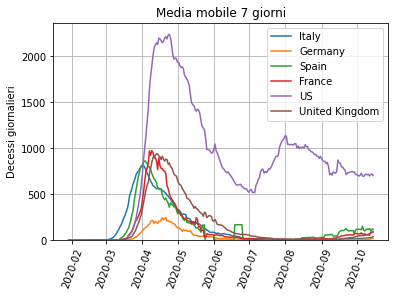

In [ ]:
for country in list_of_countries:
    plt.plot(daily_deaths_avg(country)[0],daily_deaths_avg(country)[1],label=country)
plt.xticks(rotation=70)
plt.ylim(0,)
plt.grid()
plt.ylabel('Decessi giornalieri')
plt.title('Media mobile 7 giorni')
plt.legend()
plt.show()

In [ ]:
# with a list of countries, normalized to the population

list_of_countries2 = ['Italy','Germany','Spain','France','US','United Kingdom','Sweden']
population_dict = {'Italy':60.36*10**6,
                  'Germany':83.02*10**6,
                  'Spain':46.94*10**6,
                  'France':66.99*10**6,
                  'US':328.2*10**6,
                  'United Kingdom':66.65*10**6,
                  'Sweden':10.23*10**6}

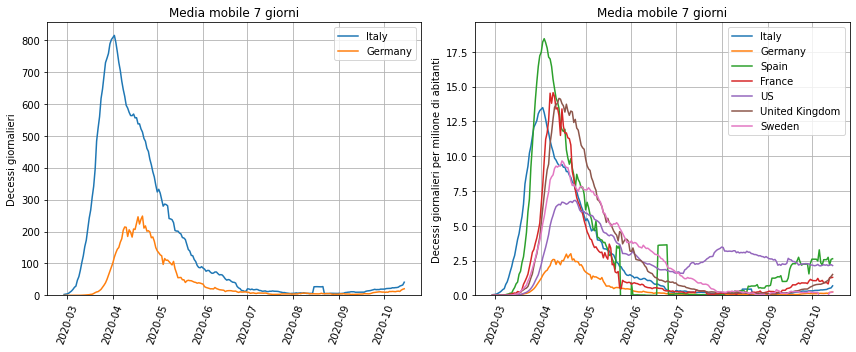

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(daily_deaths_avg('Italy')[0][30:],daily_deaths_avg('Italy')[1][30:],label='Italy')
plt.plot(daily_deaths_avg('Germany')[0][30:],daily_deaths_avg('Germany')[1][30:],label='Germany')
plt.xticks(rotation=70)
plt.ylim(0,)
plt.grid()
plt.ylabel('Decessi giornalieri')
plt.title('Media mobile 7 giorni')
plt.legend()
plt.subplot(1,2,2)
for country in list_of_countries2:
    plt.plot(daily_deaths_avg(country)[0][30:],daily_deaths_avg(country)[1][30:]/population_dict[country]*10**6,label=country)
plt.xticks(rotation=70)
plt.ylim(0,)
plt.grid()
plt.ylabel('Decessi giornalieri per milione di abitanti')
plt.title('Media mobile 7 giorni')
plt.legend()
plt.tight_layout()
plt.savefig('deaths_report.png',dpi=300)
plt.show()

### Nuovi infetti giornalieri

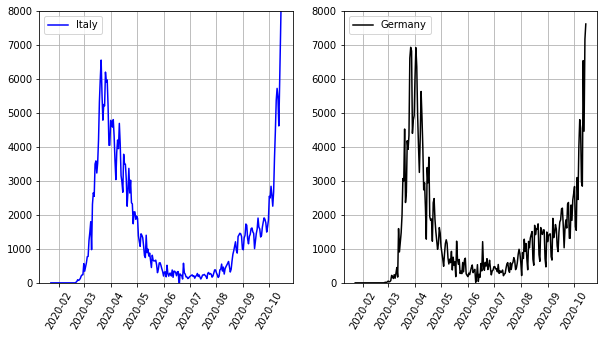

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(daily_infected('Italy')[0],daily_infected('Italy')[1],label='Italy',color='blue')
plt.legend()
plt.ylim(0,8000)
plt.grid()
plt.xticks(rotation=60)
plt.subplot(1,2,2)
plt.plot(daily_infected('Germany')[0],daily_infected('Germany')[1],label='Germany',color='black')
plt.legend()
plt.grid()
plt.ylim(0,8000)
plt.xticks(rotation=60)
plt.show()

### Funzioni cumulative (infetti, guariti e deceduti)

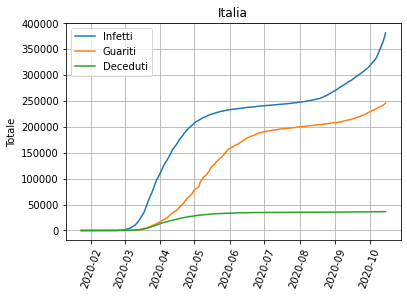

In [ ]:
plt.plot(daily_infected('Italy')[0],np.cumsum(daily_infected('Italy')[1]),label='Infetti')
plt.plot(daily_infected('Italy')[0],np.cumsum(daily_recovered('Italy')[1]),label='Guariti')
plt.plot(daily_infected('Italy')[0],np.cumsum(daily_deaths('Italy')[1]),label='Deceduti')
plt.legend()
plt.xticks(rotation=70)
plt.ylabel('Totale')
plt.title('Italia')
plt.grid()
plt.show()

# Modelli matematici

In [ ]:
from scipy.integrate import odeint

### SIR model

In [ ]:


# The SIR model differential equations.
def deriv_SIR(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

def SIR(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_SIR, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)



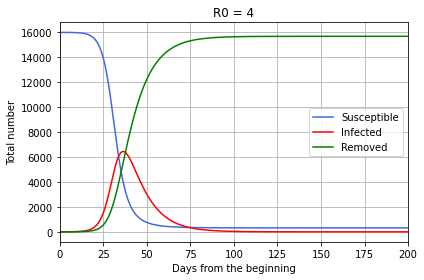

In [ ]:
r0_example=4

fin_res_SIR1=SIR(16000,0.1*r0_example,0.1,I0=1,R0=0)
t_vec=fin_res_SIR1[0]
s_vec=fin_res_SIR1[1]
i_vec=fin_res_SIR1[2]
r_vec=fin_res_SIR1[3]

plt.plot(t_vec,s_vec,color='royalblue',label='Susceptible')
plt.plot(t_vec,i_vec,color='red',label='Infected')
plt.plot(t_vec,r_vec,color='green',label='Removed')
#plt.plot(t_vec,r0_example*s_vec/1000*100,color='black',label='R0 x 100',linestyle='--')
plt.xlim(0,200)
#plt.ylim(0,500)
plt.xlabel('Days from the beginning')
plt.ylabel('Total number')
plt.title('R0 = '+str(r0_example))
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('SIR_example.png',dpi=300)
plt.show()

### SIR 2.0 model 
In questo modello il parametro beta decade esponenzialmente nel corso del tempo. Al contrario, nel SIR classico il parmaetro beta è costante nel tempo

In [ ]:
# The SIR model differential equations.
def deriv_SIR_2(y, t, N, beta1,gamma,tau=10**6,t_thresh=14):
    S,I,R = y
    
    if t<=t_thresh:      # il lockdown nazionale inizia al 14° giorno 
        B=beta1
    else: 
        B=beta1*np.exp(-(t-t_thresh)/tau)

    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt


def SIR_2(N,beta1,gamma,tau=10**6,t_thresh=14,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_SIR_2, y0, t, args=(N,beta1,gamma,tau,t_thresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

### Progetti futuri...
Sarebbe estremamente interessante riuscire ad implementare il modello contenuto in https://www.medrxiv.org/content/medrxiv/early/2020/04/07/2020.04.04.20053637.full.pdf  per prevedere l'andamento della seconda ondata

In [ ]:
# prova aggiunta codice 

df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228
